In [83]:
!pip install xgboost

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xg
from sklearn.metrics import r2_score,mean_absolute_error

In [198]:
### data Collection & Analysis

In [86]:
data=pd.read_csv('Train (1).csv')     ### big mart sale data

In [87]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [131]:
data.shape          ###### number of data points & number of features

(8523, 12)

In [132]:
data.info()         ###  getting some information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [133]:
data.select_dtypes(include=['object']).head(1)    #### categorical Features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,Medium,0,1


In [134]:
data.isna().sum()     ### checking for missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [135]:
### Handling Missing Values

#mean/median--->  numerical columns

#mode-----> catagerical columns

In [136]:
### mean value of 'Item_Weight'column

data['Item_Weight'].mean()

12.857645184135976

In [137]:
### filling the missing values in ''Item_Weight'' cplumn with "mean"value

data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [138]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [139]:
#### Replacing the missing values 'Outlet_Size' with mode

In [140]:
data_of_outlet=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))

In [141]:
data_of_outlet

Outlet_Type,0,1,2,3
Outlet_Size,"[[Small, Small, Medium, Medium]]",Small,Medium,Medium


In [142]:
missing_values=data['Outlet_Size'].isna()

In [143]:
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [144]:
data.loc[missing_values, 'Outlet_Size']=data.loc[missing_values,"Outlet_Type"].apply(lambda x:data_of_outlet)

In [145]:
##data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace=True)

In [146]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [147]:
####Data Analysis

In [148]:
           ####  statistical measures about the data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\srava\AppData\Local\Temp\ipykernel_21420\3068034952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


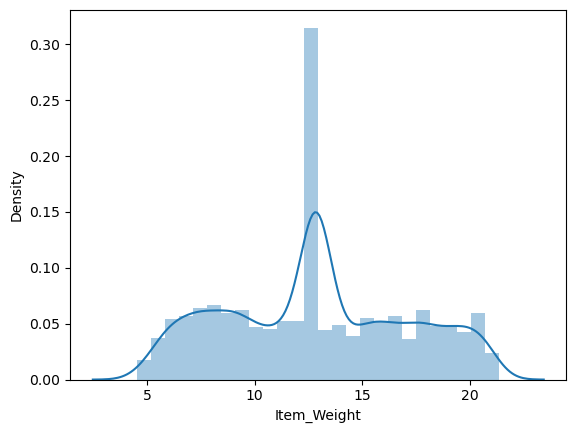

<Figure size 600x600 with 0 Axes>

In [149]:

##Item_Weight distribution
sns.distplot(data['Item_Weight'])
plt.figure(figsize=(6,6))
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_21420\3836159602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


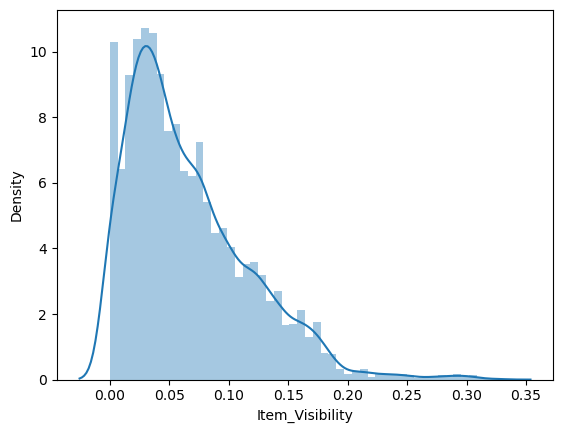

<Figure size 600x600 with 0 Axes>

In [150]:
####Item_Visibility distribution
sns.distplot(data['Item_Visibility'])
plt.figure(figsize=(6,6))
plt.show()                     ##### skewnees is postive or negitive

C:\Users\srava\AppData\Local\Temp\ipykernel_21420\1717590467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


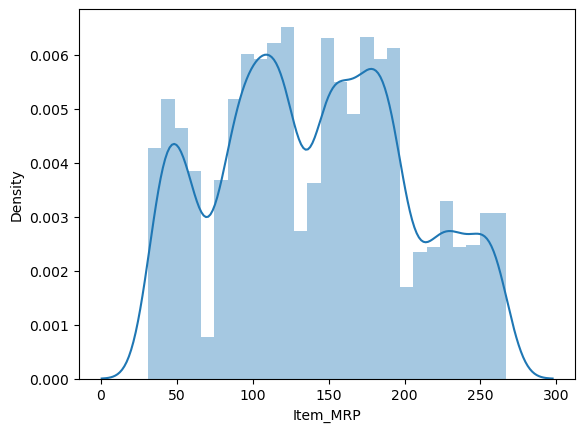

<Figure size 600x600 with 0 Axes>

In [151]:
####Item_MRP distribution
sns.distplot(data['Item_MRP'])
plt.figure(figsize=(6,6))
plt.show()                  

C:\Users\srava\AppData\Local\Temp\ipykernel_21420\2566768972.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


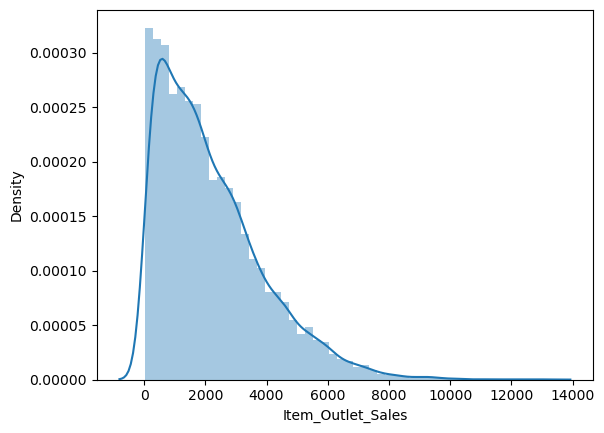

<Figure size 600x600 with 0 Axes>

In [152]:
###Item_Outlet_Sales distribution
sns.distplot(data['Item_Outlet_Sales'])
plt.figure(figsize=(6,6))
plt.show()                  

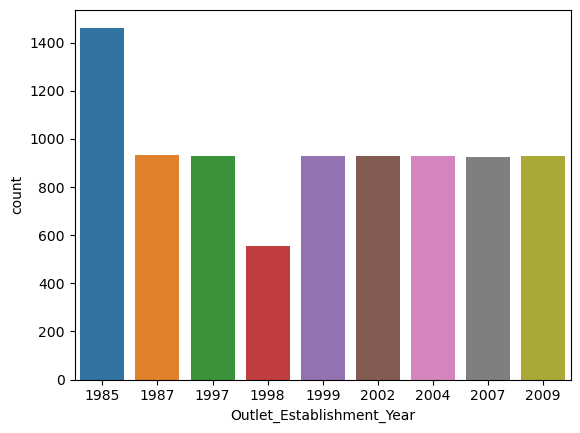

In [153]:
         ##### Outlet_Establishment_Year
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

In [154]:
#### Categorical Features

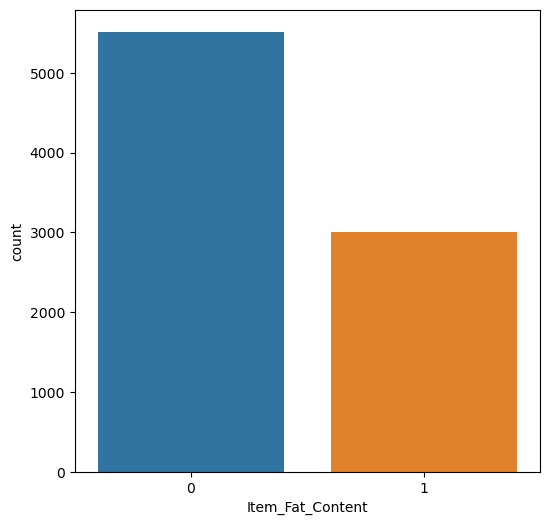

In [155]:
### Item_Fat_Content distribution

plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=data)
plt.show()

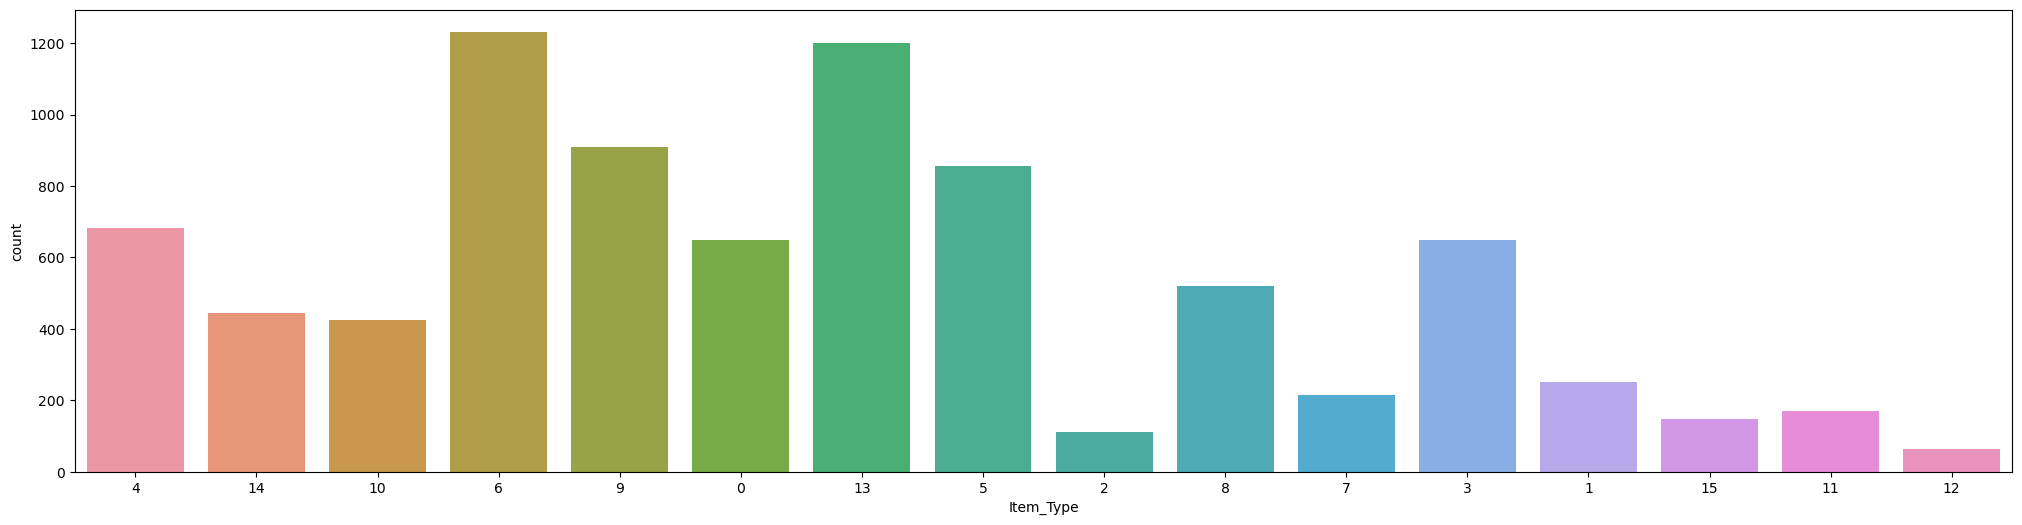

In [156]:
###Item_Type distribution
plt.figure(figsize=(25,6))
sns.countplot(x="Item_Type",data=data)
plt.show()

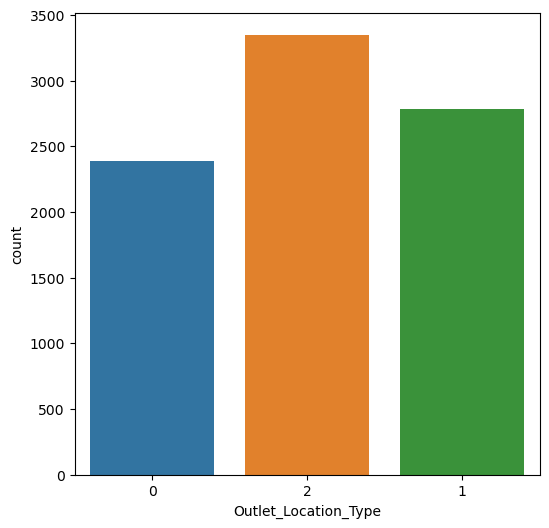

In [157]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type",data=data)
plt.show()

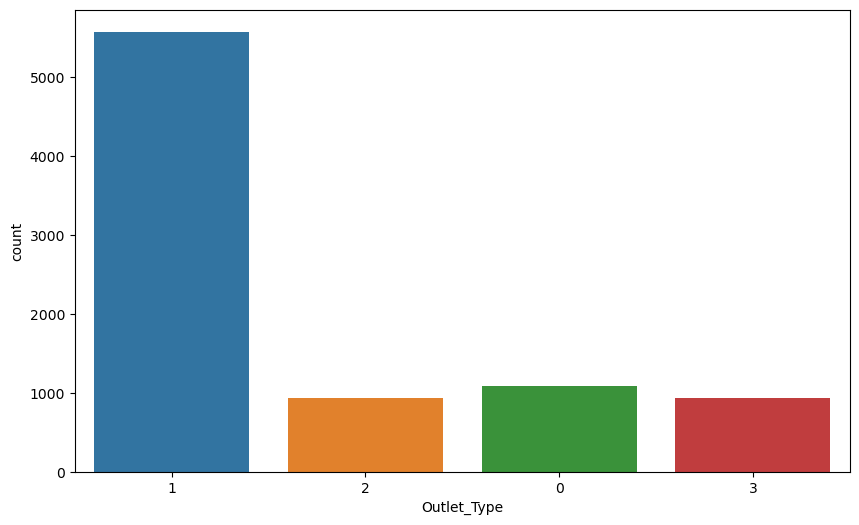

In [158]:
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Type",data=data)
plt.show()

In [159]:
###data pre_processing

In [160]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,Medium,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,High,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,Medium,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,1,1,4710.5350


In [161]:
data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [162]:
data.replace({'Item_Fat_Content':{"low fat":"Low Fat",'LF':'Low Fat','reg':'Regular'}},inplace=True)

In [163]:
data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [164]:
data["Outlet_Size"].value_counts()

Medium             2793
[Grocery Store]    2410
Small              2388
High                932
Name: Outlet_Size, dtype: int64

In [165]:
###LABEL ENCODING

In [167]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()



In [168]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier']).astype(str)
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content']).astype(str)
data['Item_Type'] = encoder.fit_transform(data['Item_Type']).astype(str)
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier']).astype(str)


In [178]:

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type']).astype(str)
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type']).astype(str)

In [179]:
data['Outlet_Size'] = data['Outlet_Size'].astype(str)
#encoder.fit_transform(data['Outlet_Size'])

In [180]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,623,9.30,0,0.016047,10,249.8092,9,1999,1,0,1,3735.1380
1,1337,5.92,1,0.019278,6,48.2692,3,2009,1,2,2,443.4228
2,1185,17.50,0,0.016760,2,141.6180,9,1999,1,0,1,2097.2700
3,138,19.20,1,0.000000,12,182.0950,0,1998,2,2,0,732.3800
4,332,8.93,0,0.000000,15,53.8614,1,1987,0,2,1,994.7052


In [181]:
### splitting feature and Target

In [182]:
x=data.drop(columns='Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [183]:
x


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,623,9.300,0,0.016047,10,249.8092,9,1999,1,0,1
1,1337,5.920,1,0.019278,6,48.2692,3,2009,1,2,2
2,1185,17.500,0,0.016760,2,141.6180,9,1999,1,0,1
3,138,19.200,1,0.000000,12,182.0950,0,1998,2,2,0
4,332,8.930,0,0.000000,15,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,861,6.865,0,0.056783,5,214.5218,1,1987,0,2,1
8519,1445,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,399,10.600,0,0.035186,14,85.1224,6,2004,3,1,1
8521,1206,7.210,1,0.145221,5,103.1332,3,2009,1,2,2


In [184]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [185]:
##splitting the data into Training data & Testing data

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [187]:
x_train.shape,x_test.shape


((6818, 11), (1705, 11))

In [188]:
y_train.shape,y_test.shape

((6818,), (1705,))

In [189]:
###MAchine Learning Model Training



###### Linear Regression

In [191]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
### EValuation

In [237]:
### prediction on training data
training_data_prediction=regressor.predict(x_train)
                               ## R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

mse = mean_squared_error(y_train, training_data_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,training_data_prediction)

print(r2_train)
print(mse)
print(rmse)
print(mae)

0.507318706350183
1412531.3433530398
1188.4996185750501
891.8073444143196


In [238]:
### prediction on training data

test_data_prediction=regressor.predict(x_test)
                        ## R squared value
r2_test=metrics.r2_score(y_test,test_data_prediction)
mse = mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_data_prediction)

print(r2_test)
print(mse)
print(rmse)
print(mae)


0.488749904735335
1578267.2398143634
1256.2910649265812
945.7091173236372


In [ ]:
###XGB regression

In [222]:
xgb_regressor = XGBRegressor()  # You can adjust hyperparameters as needed

# Fit the model to your training data
xgb_regressor.fit(training_data_prediction, y_train)

                                   # Make predictions on the test data
y_pred = xgb_regressor.predict(test_data_prediction)

                    # Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [225]:

print(mse)

print(rmse)
print(mae)
print(r2)

1608132.951487325
1268.1218204444417
938.3952603037653
0.47907546712884663
